# Analaysis 🔍

### ❗ NOTES ❗

***Please follow the instructions for this to work properly. Since this was a Hackathon, there was no time to make this into a web app.*** 

- 1. Note the `pip installs` 
- 2. Go ahead and hit the `Run All` button. 

---

In [14]:
import pandas as pd #!pip install pandas
import matplotlib.pyplot as plt #!pip install matplotlib
import seaborn as sns #!pip install seaborn

In [15]:
df = pd.read_csv("../Data/Final_Vader_Time.csv")

df.shape

/var/folders/mc/hx61cykn4zd0bdsj6s0hvlj40000gn/T/ipykernel_35274/2125904677.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/Final_Vader_Time.csv")


(231306, 19)

In [24]:
df['Correct_TimeStamp'] = pd.to_datetime(df['Correct_TimeStamp'], infer_datetime_format=True)
df['YearMonth'] = df['Correct_TimeStamp'].dt.to_period('M')
vader_scores_over_time = df.groupby(['YearMonth', 'Vader_Score']).size().unstack(fill_value=0)
vader_scores_over_time = vader_scores_over_time.reset_index()
vader_scores_over_time['YearMonth'] = vader_scores_over_time['YearMonth'].dt.to_timestamp()

In [25]:
filtered_data = vader_scores_over_time[
    (vader_scores_over_time['YearMonth'] >= '2022-10') & 
    (vader_scores_over_time['YearMonth'] <= '2024-02')
]

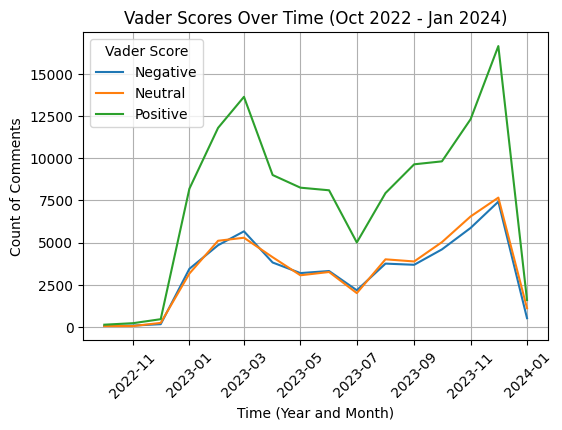

In [26]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='YearMonth', y='value', hue='Vader_Score', data=filtered_data.melt(id_vars='YearMonth'))
plt.title('Vader Scores Over Time (Oct 2022 - Jan 2024)')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Count of Comments')
plt.xticks(rotation=45)
plt.legend(title='Vader Score')
plt.grid(True)
plt.show()

---
---
---

# Search Bar 🔍

- 1. Type in a search string, make sure it stays wrapped in quotes. 
- 2. Run the cell. 
- 3. Run the cell below it. 

In [27]:
search = "spiderman"

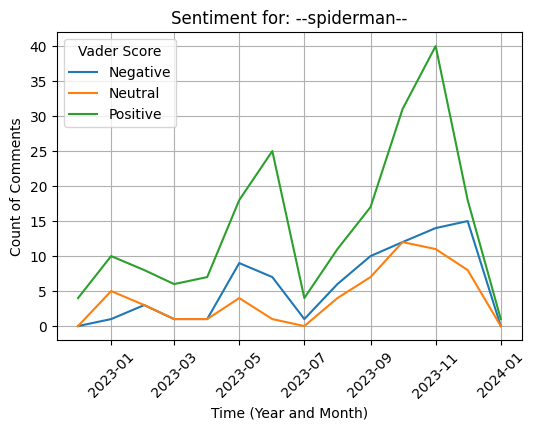

Total comments: 337
Total Negative comments: 80
Total Positive comments: 200
Total Neutral comments: 57


In [28]:
df_filtered = df[df.apply(lambda row: row.astype(str).str.contains(search).any(), axis=1)]

vader_scores_over_time2 = df_filtered.groupby(['YearMonth', 'Vader_Score']).size().unstack(fill_value=0)
vader_scores_over_time2 = vader_scores_over_time2.reset_index()
vader_scores_over_time2['YearMonth'] = vader_scores_over_time2['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(6, 4))
sns.lineplot(x='YearMonth', y='value', hue='Vader_Score', data=vader_scores_over_time2.melt(id_vars='YearMonth'))
plt.title(f'Sentiment for: --{search}--')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Count of Comments')
plt.xticks(rotation=45)
plt.legend(title='Vader Score')
plt.grid(True)
plt.show()

temp_total_comments = vader_scores_over_time2["Negative"].sum() + vader_scores_over_time2["Positive"].sum() + vader_scores_over_time2["Neutral"].sum()

print(f'Total comments: {temp_total_comments}')
print(f'Total Negative comments: {vader_scores_over_time2["Negative"].sum()}')
print(f'Total Positive comments: {vader_scores_over_time2["Positive"].sum()}')
print(f'Total Neutral comments: {vader_scores_over_time2["Neutral"].sum()}')

---
---
---

# Ahmed Code here 👇

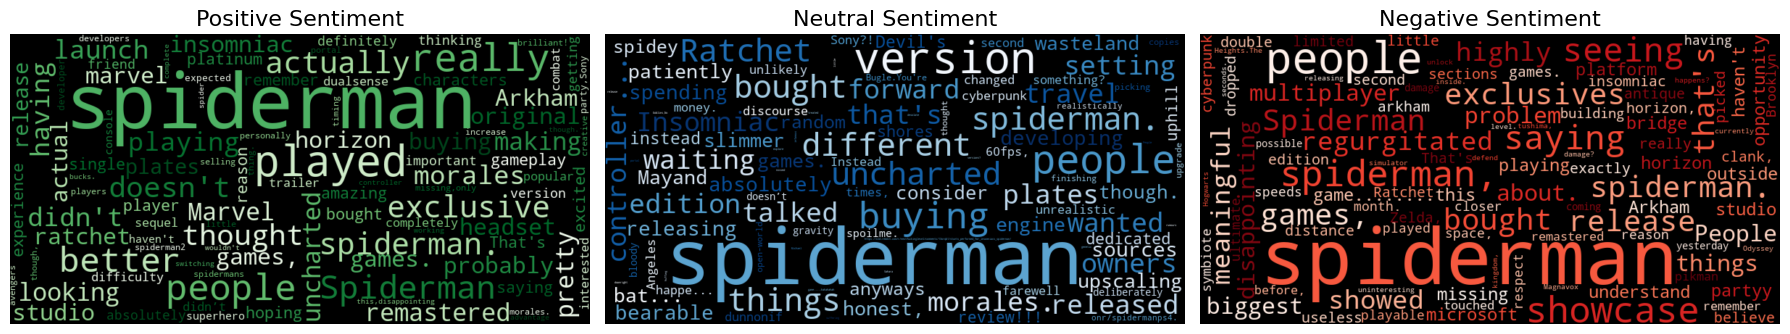

In [130]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd


def generate_wordcloud(sentiment, color, axs):
    comments = ' '.join(df_filtered[df_filtered['Vader_Score'] == sentiment]['Comment'])
    
    words = [word for word in comments.split() if word.lower() not in ENGLISH_STOP_WORDS]
    
    word_frequencies = {word: words.count(word) for word in set(words)}
    
    wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100,
                          colormap=color, random_state=42)
    
    wordcloud.generate_from_frequencies({word: freq for word, freq in word_frequencies.items() if len(word) > 5})
    
    axs.imshow(wordcloud, interpolation='bilinear')
    axs.set_title(f'{sentiment.capitalize()} Sentiment', fontsize=16)
    axs.axis('off')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

generate_wordcloud('Positive', 'Greens', axs[0])
generate_wordcloud('Neutral', 'Blues', axs[1])
generate_wordcloud('Negative', 'Reds', axs[2])

plt.tight_layout()
plt.show()
